In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df = pd.read_csv("Google_Original.csv")
df

,date,Total Assets,EPS,D/E ratio,Research & Development Expense,2 years,10 years,30 years,CrudeOil,DXY,...,CRB,Housing Starts,Existing Home Sales,NonFarmPayrolls,UnemploymentRate,CPI,PMI,GDP,GDP%,Google Price
0,1262534400,40497.0,3.07,0.000,736.2,1.09,3.85,4.65,81.51,77.525,...,289.3430,591000.0,5050000.0,-20000.0,0.097,0.002,58.4,14926.098,0.027,312.204773
1,1262620800,40497.0,3.07,0.000,736.2,1.01,3.77,4.59,81.77,77.619,...,289.3876,591000.0,5050000.0,-20000.0,0.097,0.002,58.4,14926.098,0.027,310.829926
2,1262707200,40497.0,3.07,0.000,736.2,1.01,3.85,4.70,83.18,77.493,...,293.7768,591000.0,5050000.0,-20000.0,0.097,0.002,58.4,14926.098,0.027,302.994293
3,1262793600,40497.0,3.07,0.000,736.2,1.03,3.85,4.69,82.66,77.913,...,290.5310,591000.0,5050000.0,-20000.0,0.097,0.002,58.4,14926.098,0.027,295.940735
4,1262880000,40497.0,3.07,0.000,736.2,0.96,3.83,4.70,82.75,77.471,...,290.7665,591000.0,5050000.0,-20000.0,0.097,0.002,58.4,14926.098,0.027,299.885956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,1608652800,319616.0,26.26,0.068,7022.0,0.13,0.96,1.70,48.12,90.413,...,165.2841,1669000.0,6760000.0,-140000.0,0.067,0.004,60.7,22048.894,0.043,1732.380005
2619,1609084800,319616.0,26.26,0.068,7022.0,0.13,0.94,1.67,47.62,90.337,...,164.1339,1669000.0,6760000.0,-140000.0,0.067,0.004,60.7,22048.894,0.043,1776.089966
2620,1609171200,319616.0,26.26,0.068,7022.0,0.12,0.94,1.67,48.00,89.994,...,165.3742,1669000.0,6760000.0,-140000.0,0.067,0.004,60.7,22048.894,0.043,1758.719971
2621,1609257600,319616.0,26.26,0.068,7022.0,0.12,0.93,1.66,48.40,89.680,...,166.6791,1669000.0,6760000.0,-140000.0,0.067,0.004,60.7,22048.894,0.043,1739.520020


In [4]:
date = df["date"].apply(datetime.datetime.fromtimestamp).apply(str).apply(lambda s:s[:10]).to_list()
date[0]

'2010-01-04'

In [ ]:
for i in range(22):
    fig = plt.figure(figsize=(20,6))
    fig.set_facecolor("orange")
    plt.plot(df.iloc[:,i+1])
    plt.xticks(np.arange(0, len(df), 300), date[::300], rotation=45)
    plt.title(df.columns[i+1], fontsize=16)
    plt.savefig(str(i)+".png")
    plt.show()

<Figure size 432x288 with 0 Axes>

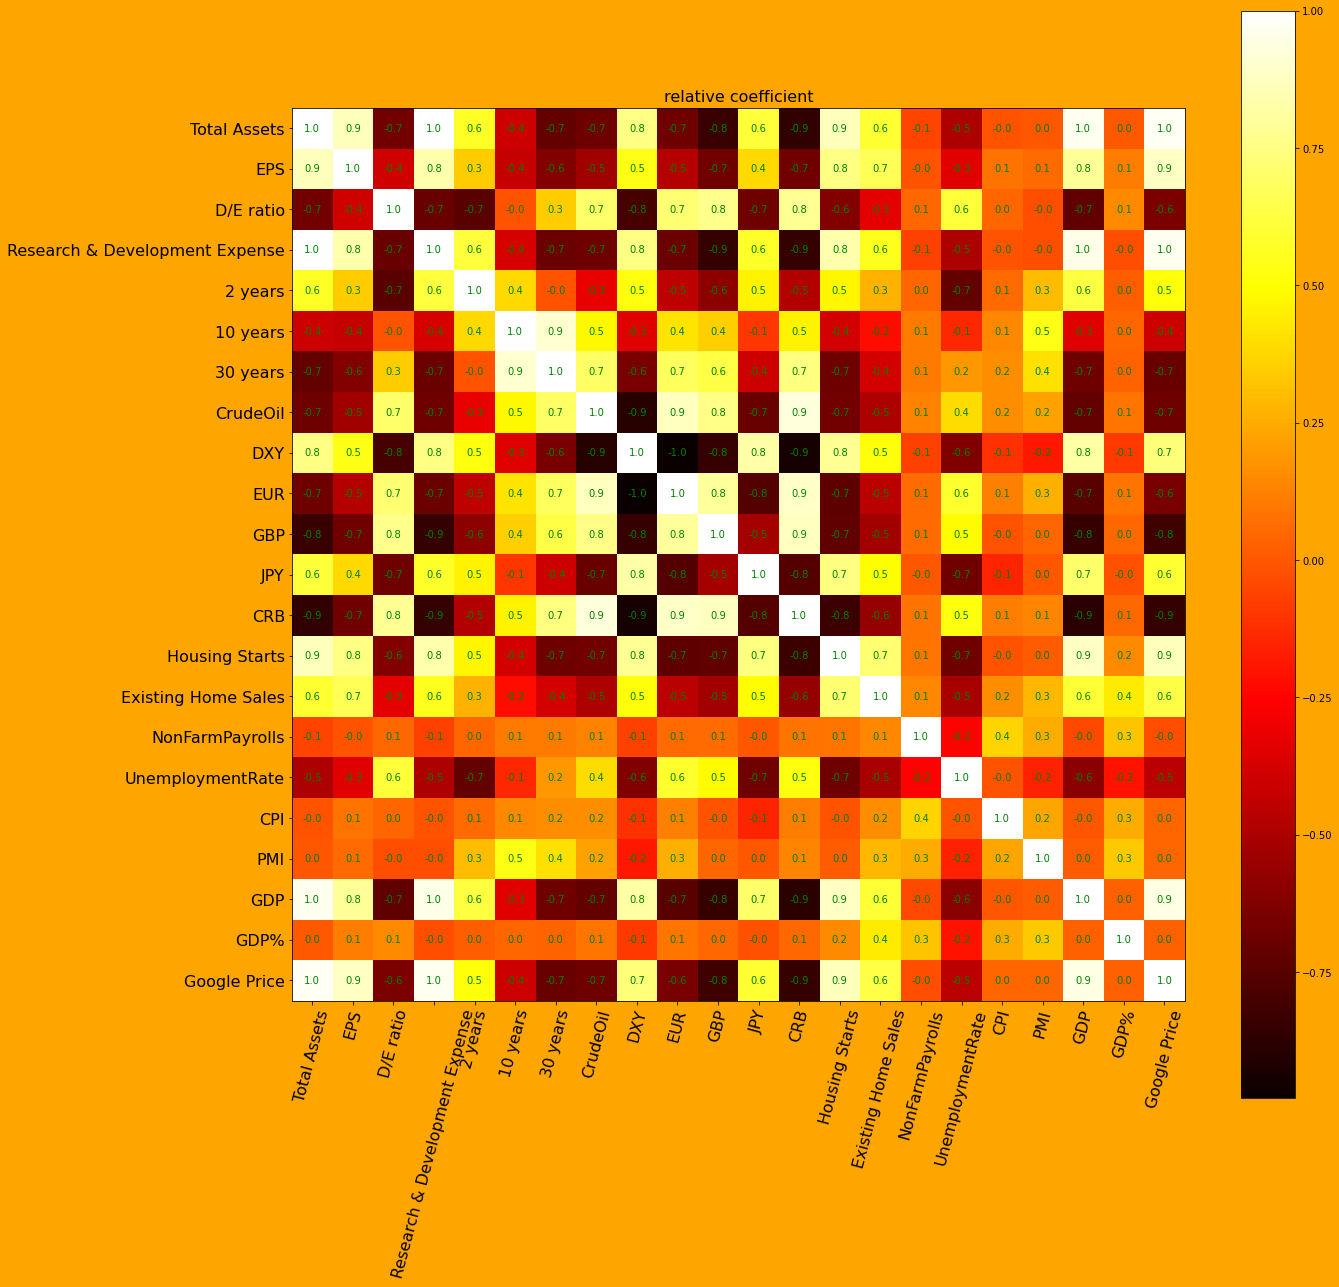

In [5]:
if "date" in df.columns:
    df = df.drop(columns=["date"])
cols = df.columns.to_list()

corr = df.corr().to_numpy()
plt.figure()
fig, ax = plt.subplots(figsize=(20,20)) # different from the others
fig.set_facecolor("orange")
plt.imshow( corr, cmap='hot' )
plt.title("relative coefficient", fontsize=16)
plt.xticks(np.arange(0,len(corr),1), cols, rotation=75, fontsize=16)
plt.yticks(np.arange(0,len(corr),1), cols, fontsize=16)

for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j, i, round(corr[i,j],1), ha="center", va="center", color="g")
plt.colorbar()
plt.show()